In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import os



In [2]:
stock_data = pd.read_csv('../raw_data/stock_data.csv')

In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt            8597 non-null   object 
 1   vix           8597 non-null   float64
 2   sp500         8597 non-null   float64
 3   sp500_volume  8597 non-null   float64
 4   djia          8597 non-null   float64
 5   djia_volume   8597 non-null   float64
 6   hsi           8597 non-null   float64
 7   ads           8597 non-null   float64
 8   us3m          8597 non-null   float64
 9   joblessness   8597 non-null   int64  
 10  epu           8597 non-null   float64
 11  GPRD          8597 non-null   float64
 12  prev_day      8597 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.3+ KB


In [4]:
stock_data.head(10)


,dt,vix,sp500,sp500_volume,djia,djia_volume,hsi,ads,us3m,joblessness,epu,GPRD,prev_day
0,1990-01-03,18.19,358.760010,192330000.0,2809.73,23.62,2858.699951,-0.229917,7.89,3,100.359178,75.408051,359.690002
1,1990-01-04,19.22,355.670013,177000000.0,2796.08,24.37,2868.000000,-0.246065,7.84,3,100.359178,56.085804,358.760010
2,1990-01-05,20.11,352.200012,158530000.0,2773.25,20.29,2839.899902,-0.260393,7.79,3,100.359178,63.847675,355.670013
3,1990-01-08,20.26,353.790009,140110000.0,2794.37,16.61,2816.000000,-0.291750,7.79,3,100.359178,102.841156,352.200012
4,1990-01-09,22.20,349.619995,155210000.0,2766.00,15.80,2822.000000,-0.297326,7.80,3,100.359178,138.435669,353.790009
5,1990-01-10,22.44,347.309998,175990000.0,2750.64,19.95,2868.000000,-0.300341,7.75,3,100.359178,103.517738,349.619995
6,1990-01-11,20.05,348.529999,154390000.0,2760.67,15.79,2855.000000,-0.300796,7.80,3,100.359178,77.207466,347.309998
7,1990-01-12,24.64,339.929993,183880000.0,2689.21,24.18,2835.000000,-0.298692,7.74,3,100.359178,69.954849,348.529999
8,1990-01-15,26.34,337.000000,140590000.0,2669.37,18.63,2788.600098,-0.277353,7.74,3,100.359178,101.842697,339.929993
9,1990-01-16,24.18,340.750000,186070000.0,2692.62,25.00,2751.800049,-0.265677,7.89,3,100.359178,78.403969,337.000000


In [5]:
stock_data.shape[0]

8597

There are 13 columns and 8587 rows in this dataset

In [6]:
stock_data.T

,0,1,2,3,4,5,6,7,8,9,...,8587,8588,8589,8590,8591,8592,8593,8594,8595,8596
dt,1990-01-03,1990-01-04,1990-01-05,1990-01-08,1990-01-09,1990-01-10,1990-01-11,1990-01-12,1990-01-15,1990-01-16,...,2024-02-05,2024-02-06,2024-02-07,2024-02-08,2024-02-09,2024-02-12,2024-02-13,2024-02-14,2024-02-15,2024-02-16
vix,18.19,19.22,20.11,20.26,22.2,22.44,20.05,24.64,26.34,24.18,...,13.67,13.06,12.83,12.79,12.93,13.93,15.85,14.38,14.01,14.24
sp500,358.76001,355.670013,352.200012,353.790009,349.619995,347.309998,348.529999,339.929993,337.0,340.75,...,4942.81,4954.23,4995.06,4997.91,5026.61,5021.84,4953.17,5000.62,5029.73,5005.57
sp500_volume,192330000.0,177000000.0,158530000.0,140110000.0,155210000.0,175990000.0,154390000.0,183880000.0,140590000.0,186070000.0,...,4023640000.0,4440880000.0,4895590000.0,4341860000.0,3912990000.0,3805740000.0,4302190000.0,3845600000.0,4137970000.0,3833270000.0
djia,2809.73,2796.08,2773.25,2794.37,2766.0,2750.64,2760.67,2689.21,2669.37,2692.62,...,38379.59,38520.96,38677.36,38726.13,38671.3,38797.9,38272.49,38423.68,38773.12,38627.99
djia_volume,23.62,24.37,20.29,16.61,15.8,19.95,15.79,24.18,18.63,25.0,...,310.7,265.39,291.14,303.22,294.58,260.66,305.8,265.9,300.35,274.75
hsi,2858.699951,2868.0,2839.899902,2816.0,2822.0,2868.0,2855.0,2835.0,2788.600098,2751.800049,...,15510.009766,16136.870117,16081.889648,15878.070313,15746.580078,15746.580078,15746.580078,15879.379883,15944.629883,16339.959961
ads,-0.229917,-0.246065,-0.260393,-0.29175,-0.297326,-0.300341,-0.300796,-0.298692,-0.277353,-0.265677,...,-0.308651,-0.270914,-0.235461,-0.202277,-0.171349,-0.092373,-0.071135,-0.052492,-0.036436,-0.02296
us3m,7.89,7.84,7.79,7.79,7.8,7.75,7.8,7.74,7.74,7.89,...,5.42,5.44,5.43,5.44,5.44,5.43,5.45,5.43,5.43,5.44
joblessness,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1


In [7]:
stock_data.isnull().sum()

dt              0
vix             0
sp500           0
sp500_volume    0
djia            0
djia_volume     0
hsi             0
ads             0
us3m            0
joblessness     0
epu             0
GPRD            0
prev_day        0
dtype: int64

There are no missing values in this dataset

In [8]:
stock_data.select_dtypes('object')

,dt
0,1990-01-03
1,1990-01-04
2,1990-01-05
3,1990-01-08
4,1990-01-09
...,...
8592,2024-02-12
8593,2024-02-13
8594,2024-02-14
8595,2024-02-15


In [9]:
stock_data['dt'] = pd.to_datetime(stock_data['dt'], format='%Y-%m-%d')

In [10]:
stock_data.dtypes

dt              datetime64[ns]
vix                    float64
sp500                  float64
sp500_volume           float64
djia                   float64
djia_volume            float64
hsi                    float64
ads                    float64
us3m                   float64
joblessness              int64
epu                    float64
GPRD                   float64
prev_day               float64
dtype: object

In [11]:
stock_data.describe()

,dt,vix,sp500,sp500_volume,djia,djia_volume,hsi,ads,us3m,joblessness,epu,GPRD,prev_day
count,8597,8597.000000,8597.000000,8.597000e+03,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000
mean,2007-01-19 10:42:31.866930432,19.560306,1596.652238,2.463780e+09,13662.535273,183.166216,16763.460949,-0.158047,2.690266,2.492381,115.564631,109.435667,1596.111831
min,1990-01-03 00:00:00,9.140000,295.459991,1.499000e+07,2365.100000,1.590000,2736.600098,-26.418300,0.000000,1.000000,57.202620,9.491598,295.459991
25%,1998-07-06 00:00:00,13.850000,898.700012,6.467400e+08,8038.570000,63.720000,10722.799805,-0.383563,0.180000,1.000000,85.925868,72.857056,897.989990
50%,2007-01-22 00:00:00,17.730000,1270.199951,2.521000e+09,10846.290000,177.830000,16803.759766,-0.045977,2.300000,2.000000,106.115769,96.603577,1270.089966
75%,2015-08-04 00:00:00,22.960000,2058.899902,3.834320e+09,17635.390000,272.590000,22867.330078,0.247940,4.990000,3.000000,137.077404,129.159744,2058.689941
max,2024-02-16 00:00:00,82.690000,5029.730000,1.145623e+10,38797.900000,922.680000,33154.121094,9.482140,8.260000,4.000000,350.459817,1045.603638,5029.730000
std,NaN,7.902780,1106.241259,1.847305e+09,9022.864862,133.671305,7350.096474,1.651492,2.296294,1.117501,41.579530,64.568210,1105.710429


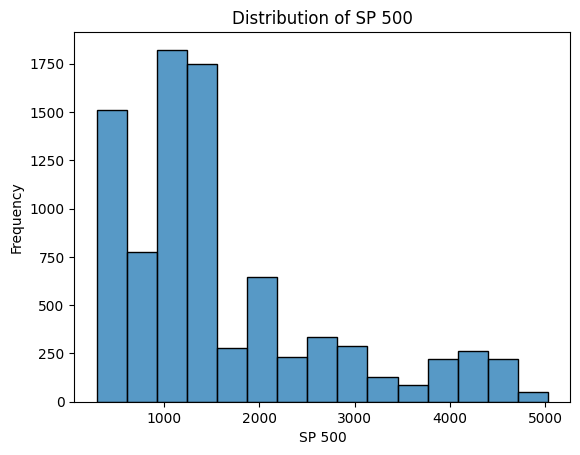

In [12]:
sns.histplot(stock_data['sp500'], bins=15)
plt.title('Distribution of SP 500')
plt.xlabel('SP 500')
plt.ylabel('Frequency')
plt.show()

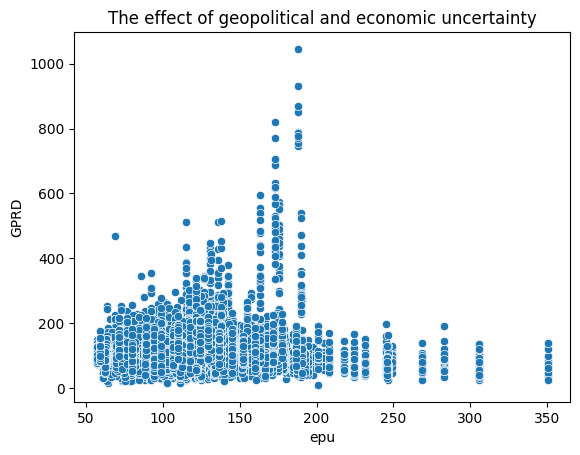

In [13]:
sns.scatterplot(x='epu', y='GPRD', data=stock_data)
plt.title('The effect of geopolitical and economic uncertainty')
plt.xlabel('epu')
plt.ylabel('GPRD')
plt.show()



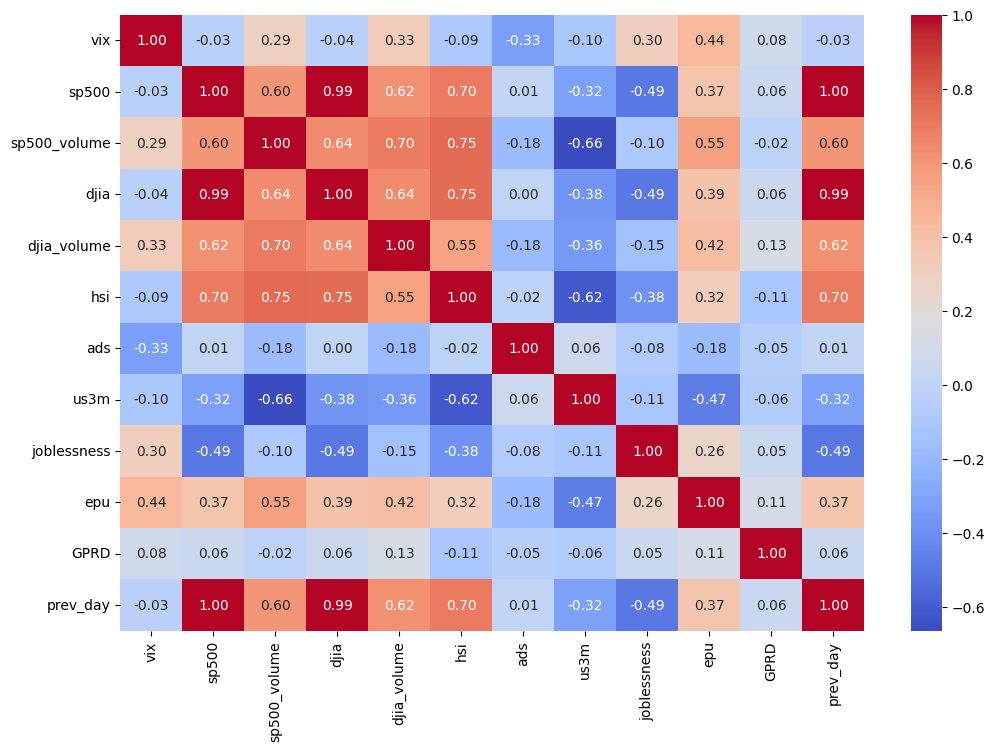

In [14]:
heat = stock_data.select_dtypes(include=[np.number])

matrix = heat.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [15]:
from library.sb_utils import save_file

datapath = '../data'
save_file(stock_data,'stock_data_cleaned.csv', datapath)

Directory ../data was created.
Writing file.  "../data/stock_data_cleaned.csv"
